In [1]:
%matplotlib inline

import pandas
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
from matplotlib import rc, cm
from numpy import log, inf, nan 

In [2]:
df = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 ) 

## Figure 1: overview

In [3]:
## Miscellaneous for paper 

### Number of uniq seq positions mutated 

len( df.sequence_pos.unique() ) 

66

In [4]:
# figure 1: overview 

s = '+'.join( [ i for i in df.sequence_pos.dropna().astype( int ).astype( str ) ] ) 
print 'select all_mutants, resi', s 

select all_mutants, resi 12+14+15+16+16+17+17+18+19+19+19+19+32+34+52+72+76+91+101+119+119+119+120+120+120+121+154+163+163+163+163+163+164+164+164+166+167+167+171+171+175+177+177+177+178+178+192+218+220+220+220+220+220+221+222+222+222+222+222+222+236+240+240+240+240+244+244+249+293+293+293+293+293+294+294+294+295+296+296+298+300+313+315+315+323+323+325+325+325+325+325+325+325+329+331+341+343+352+353+354+355+358+362+373+379+399+399+399+399+399+400+403+404+404+406+406+407+407+407+407+407+407+409+415+415


In [5]:
# mutants that don't express 

no_express = df[( df.expression < 1 )]
no_express

sequence_pos  expression  tm               note   kcat     km  ekcat  \
mutant                                                                         
G12N            12.0           0 NaN                NaN    NaN    NaN    NaN   
S16N            16.0           0 NaN    below detection    NaN    NaN    NaN   
Q19P            19.0           0 NaN                NaN    NaN    NaN    NaN   
S32L            32.0           0 NaN                NaN    NaN    NaN    NaN   
W34A            34.0           0 NaN      no expression    NaN    NaN    NaN   
F72H            72.0           0 NaN         no protein    NaN    NaN    NaN   
R76A            76.0           0 NaN      no expression    NaN    NaN    NaN   
H119E          119.0           0 NaN      no expression    NaN    NaN    NaN   
W120A          120.0           0 NaN    below detection    NaN    NaN    NaN   
D121F          121.0           0 NaN                NaN    NaN    NaN    NaN   
N163E          163.0           0 NaN                NaN    NaN    NaN    NaN   
N163K          163.0           0 NaN                NaN    NaN    NaN    NaN   
E164G          164.0           0 NaN  catalytic residue    NaN    NaN    NaN   
Y166P          166.0           0 NaN         no protein   27.0   2.50    1.0   
H178R          178.0           0 NaN    below detection    NaN    NaN    NaN   
M221A          221.0           0 NaN         no protein  547.0   6.25   15.0   
E222Y          222.0           0 NaN      no expression   12.0  18.43    1.0   
E222R          222.0           0 NaN         no protein   42.0   2.48    2.0   
A236E          236.0           0 NaN                NaN    NaN    NaN    NaN   
R240D          240.0           0 NaN    below detection  282.0  10.82    4.0   
R240E          240.0           0 NaN         no protein    NaN    NaN    NaN   
I244N          244.0           0 NaN         no protein  271.0   2.15    4.0   
A249E          249.0           0 NaN                NaN    NaN    NaN    NaN   
N293K          293.0           0 NaN                NaN    NaN    NaN    NaN   
Y294L          294.0           0 NaN                NaN    NaN    NaN    NaN   
Y295A          295.0           0 NaN  catalytic residue    NaN    NaN    NaN   
T296A          296.0           0 NaN         no protein  109.0  11.05    2.0   
T296E          296.0           0 NaN                NaN    NaN    NaN    NaN   
H315N          315.0           0 NaN         no protein    NaN    NaN    NaN   
M323K          323.0           0 NaN         no protein    NaN    NaN    NaN   
W325G          325.0           0 NaN         no protein    NaN    NaN    NaN   
P329N          329.0           0 NaN      no expression    NaN    NaN    NaN   
F343S          343.0           0 NaN                NaN    NaN    NaN    NaN   
G355A          355.0           0 NaN         no protein    NaN    NaN    NaN   
H379T          379.0           0 NaN    below detection    NaN    NaN    NaN   
W399A          399.0           0 NaN    below detection    0.0  16.65    0.0   
D403A          403.0           0 NaN      no expression    NaN    NaN    NaN   
W407A          407.0           0 NaN      no expression    NaN    NaN    NaN   
W407G          407.0           0 NaN      no expression    NaN    NaN    NaN   
W407Q          407.0           0 NaN      no expression    NaN    NaN    NaN   
W407R          407.0           0 NaN      no expression    NaN    NaN    NaN   
W407Y          407.0           0 NaN                NaN    NaN    NaN    NaN   
W407K          407.0           0 NaN                NaN    NaN    NaN    NaN   

         ekm      ki    eki    kcatkm  ekcatkm  in_plos_paper  added_later  
mutant                                                                      
G12N     NaN     NaN    NaN       NaN      NaN              0            1  
S16N     NaN     NaN    NaN       NaN      NaN              0            0  
Q19P     NaN     NaN    NaN       NaN      NaN              0            1  
S32L     NaN     NaN  

In [6]:
ddg = pandas.read_csv( '../data_sets/features/ddg_monomer.csv', index_col=0 )
ddg

2         3        4         5      6        7      8        9  \
0                                                                              
A192S -1393.444 -3502.441  267.133  1854.209  5.112 -237.372  0.932 -129.111   
C167A -1393.159 -3502.419  267.399  1853.890  5.118 -237.198  0.940 -129.198   
C167Q -1393.348 -3502.367  267.348  1853.859  5.117 -237.393  0.936 -129.208   
D403A -1393.364 -3501.851  268.215  1853.183  5.123 -238.024  0.944 -129.235   
E154D -1394.420 -3503.665  267.675  1854.589  5.118 -239.181  0.934 -129.254   
E164A -1394.904 -3501.949  268.470  1853.510  5.092 -238.910  0.912 -129.863   
E164G -1396.427 -3501.745  268.129  1853.394  5.095 -238.950  0.913 -129.173   
E164R -1396.434 -3501.734  268.149  1853.385  5.095 -238.946  0.911 -129.178   
E177A -1393.531 -3502.692  267.090  1854.020  5.118 -238.010  0.935 -129.219   
E177K -1393.531 -3502.692  267.090  1854.020  5.118 -238.010  0.935 -129.219   
E177L -1393.531 -3502.692  267.090  1854.020  5.118 -238.010  0.935 -129.219   
E222A -1390.821 -3500.794  267.812  1850.713  5.120 -233.805  0.940 -129.202   
E222H -1390.821 -3500.794  267.812  1850.713  5.120 -233.805  0.940 -129.202   
E222K -1391.431 -3500.289  268.825  1850.492  5.122 -234.980  0.929 -129.363   
E222Q -1391.940 -3500.950  267.783  1850.946  5.120 -234.773  0.935 -129.237   
E222R -1390.821 -3500.794  267.812  1850.713  5.120 -233.805  0.940 -129.202   
E222Y -1390.821 -3500.794  267.812  1850.713  5.120 -233.805  0.940 -129.202   
E353A -1395.606 -3501.372  268.937  1852.920  5.097 -238.699  0.909 -129.115   
E406A -1394.642 -3503.247  267.043  1854.192  5.119 -238.605  0.944 -129.212   
E406D -1394.686 -3503.041  267.108  1854.164  5.119 -238.739  0.937 -129.197   
E423S -1394.348 -3503.116  267.086  1854.233  5.118 -238.409  0.930 -129.153   
F415A -1393.366 -3500.186  265.658  1851.819  5.117 -238.815  0.933 -129.221   
F415N -1394.665 -3503.169  267.188  1854.249  5.118 -238.790  0.936 -129.214   
F72H  -1397.752 -3503.267  268.847  1854.115  5.115 -238.061  0.923 -129.313   
G355A -1396.405 -3501.747  268.133  1853.386  5.093 -238.943  0.910 -129.181   
H101R -1394.745 -3502.918  267.125  1854.133  5.119 -238.475  0.932 -129.235   
H119A -1392.934 -3501.438  268.332  1853.828  5.092 -235.669  0.917 -129.156   
H119E -1392.934 -3501.438  268.332  1853.828  5.092 -235.669  0.917 -129.156   
H119N -1392.934 -3501.438  268.332  1853.828  5.092 -235.669  0.917 -129.156   
H178A -1395.204 -3501.319  268.341  1853.002  5.097 -238.422  0.911 -129.166   
...         ...       ...      ...       ...    ...      ...    ...      ...   
T218A -1395.051 -3502.373  266.800  1853.215  5.100 -237.676  0.911 -129.135   
T296A -1386.978 -3501.771  267.807  1851.517  5.108 -232.209  0.931 -129.833   
T352A -1395.649 -3501.373  269.009  1852.920  5.099 -238.831  0.910 -129.144   
V52G  -1393.828 -3503.091  268.395  1854.427  5.120 -239.246  0.918 -129.294   
W120A -1395.286 -3501.561  268.467  1853.426  5.095 -238.707  0.925 -129.832   
W120F -1396.592 -3501.666  268.224  1853.406  5.098 -238.717  0.908 -129.150   
W120H -1396.592 -3501.666  268.224  1853.406  5.098 -238.717  0.908 -129.150   
W325A -1391.522 -3502.876  267.951  1853.804  5.124 -237.718  0.937 -129.185   
W325C -1391.522 -3502.876  267.951  1853.804  5.124 -237.718  0.937 -129.185   
W325G -1391.522 -3502.876  267.951  1853.804  5.124 -237.718  0.937 -129.185   
W325H -1391.522 -3502.876  267.951  1853.804  5.124 -237.718  0.937 -129.185   
W325L -1391.522 -3502.876  267.951  1853.804  5.124 -237.718  0.937 -129.185   
W325R -1391.522 -3502.876  267.951  1853.804  5.124 -237.718  0.937 -129.185   
W34A  -1394.517 -3503.170  267.511  1854.397  5.126 -238.672  0.940 -129.193   
W399A -1392.812 -3501.005  269.130  1852.712  5.124 -239.081  0.923 -129.060   
W399C -1392.812 -3501.005  269.130  1852.712  5.124 -239.081  0.923 -129.060   
W399G -1392.812 -3501.005  269.130  1852.712  5.124 -239.081  0.923 -129.060   
W399R -1392.81

## Figure 2: heat map of expression and Tm for each mutant 

Here, we will display the values as a two-column heat map. 

In [16]:
heatmap_cols = [ 'expression', 'tm' ] 
heatmap_data = df[ heatmap_cols ].copy()

heatmap_data['delta_tm'] = heatmap_data.tm - 39.6
heatmap_data['expression'] = heatmap_data.expression 

img_cols = [ 'expression', 'delta_tm' ]
heatmap = heatmap_data[ img_cols ].copy() 
heatmap.loc[ 'BglB' ] = ( 1, 0 )  

print heatmap.tail( 5 ) 

        expression  delta_tm
mutant                      
W407R            0       NaN
W409Y            1 -2.985079
F415A            1       NaN
F415N            1       NaN
BglB             1  0.000000


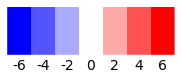

In [17]:
# heat map 

# legend 

from numpy import array 

my_scale = [ -6, -4, -2, 0, 2, 4, 6 ] 

plt.figure( figsize=( 3,20 ) ) 
plt.imshow( array( [ my_scale, my_scale ] ), interpolation='none', cmap='bwr', vmin=-6, vmax=6 )
plt.xticks( range( 7 ), my_scale ) 
plt.yticks( [] ) 
plt.tick_params( length=0 ) 
plt.savefig( 'heatmap/bwr_color_legend.pdf' )

In [19]:
# expression and tm 

plt.figure( figsize=(1,40) )
plt.subplots_adjust( left=0.1, right=1.1 )

font = { 'size': 14 }
rc('font', **font)
rc('axes', edgecolor='none')

plt.subplot( 1, 3, 1 )
plt.imshow( heatmap[ ['expression'] ], cmap='Greys', interpolation='none', vmin=-.1 ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' )
plt.yticks( range( len( heatmap.index ) ), heatmap.index )

plt.subplot( 1, 3, 2 )
plt.imshow( heatmap[ ['delta_tm'] ], interpolation='none', cmap='bwr', vmin=-6, vmax=6 ) 
plt.xticks( [ 0 ], [ '$\Delta T_m$ (K)' ], rotation='vertical' ); plt.yticks( [] ) 

#plt.show() 
plt.savefig( 'heatmap/expression_tm_heatmap.tiff', dpi=600, bbox_inches='tight' ) 

In [20]:
# conservation 

dat = pandas.read_csv( 'alignments/logo-data-bagel-aligned.txt', sep='\s+' ) 
dat['sequence_pos'] = dat.index + 1 
dat

amino_acid     #     A    C     D     E     F     G    H    I  \
0            n   200    31    4    59    25     3    38   18   16   
1            t   216    62    1   132   225     9    17   14   22   
2            f   228    57    7    26    15    12    44   14   19   
3            i   229    36    4   104    30     2    19   22    6   
4            f   249     0    1     0     0   557     0    1    6   
5            p   257    10    1    10     3     0    19    1    2   
6            a   264    62    0    60    78     0     7    6    0   
7            t   274    11    1   546    56     0   473   35    0   
8            f   285     2    0     1     1  1509     1    0    8   
9            m   320    26    2     2    10    38     6   11  140   
10           w   324     0    1     0     0   439     3    2   16   
11           g   325    20    4     1     1     1  1501    0    2   
12           t   335   398    9     1     2    26   419    2    9   
13           s   336  1204    1     0     0     0    99    1    2   
14           t   346    74    6     0     3     1     9    2  101   
15           s   347   896    2     2     0     0     1    0    0   
16           s   356  1080    5     6     0     0   108    1    1   
17           y   357    25    5     2     6   184     3  143    5   
18           q   402     0    0     1     2     0     1    2    0   
19           i   425    71  127     0     1    92     1    4  557   
20           e   436     1    0     6  1546     0     0    1    0   
21           g   438     1    7     7     0     0  1499    0    0   
22           g   439   945    3    18     7     6   344   23    2   
23           t   440   231    6    13     3    93    10   17   28   
24           d   443   103    1   231    37    32    47   45   18   
25           e   445   167    4    30   709    12    47    4   52   
26           g   446    23    0   817    43     7   378   12    1   
27           g   448     7    8    63    17     3  1260    5    1   
28           r   459    29    6     3     3     2    17    4   18   
29           t   460    40    4     0    20     0  1063   21    3   
..         ...   ...   ...  ...   ...   ...   ...   ...  ...  ...   
415          g  2873     0    0     0     0     0  1571    0    0   
416          i  2875    14    0     0     0   444     0    2  242   
417          v  2876     9   12     0     0    80     1   35  570   
418          h  2877    53    2    23    83    72    22  246    0   
419          i  2878     3    9     3     0     4     0    0  114   
420          n  2888     4    0  1322    26     0     3    1    0   
421          y  2943    26    1     1     8   330     2   18   29   
422          e  2944    92    1   458   223     4    27   49    2   
423          t  2950    37    2   197   153    31    39   38    5   
424          q  2953    12    9     4    48    45    23   18   10   
425          e  2969   126    4    48   218     0     7    7   13   
426          r  3023     0    1     0     2     1     0    1    2   
427          t  3030    11    5     0    15    34     1   42  276   
428          p  3037    50    4     3    14    10     2    2  106   
429          k  3038     1    0     1     5     0     2    1    0   
430          q  3056   153    1   417    71     4     7   13    5   
431          s  3058    34    0     0     3     2    19    1    0   
432          a  3064   563    3     4     4   518   181    1    1   
433          l  3074    89    3    90    80    77    35  128   18   
434          w  3081    66    0     4    13    81     3   11   17   
435          f  3087     5    1     0     2   317     0    2   30   
436          k  3088   181    0    16    17     0    69    8    2   
437          q  3112    44    0   181   243     1    41   30    2   
438          m  3113    21    6     1     1   208     1    3   83   
439          m  3117    64   11     2     4    63     6    1  298   
440          a  3134   354    1    32   224     0    23    7    3   
44

In [21]:
dat.columns

Index([u'amino_acid', u'#', u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I',
       u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y',
       u'Entropy', u'Low', u'High', u'Weight', u'1', u'sequence_pos'],
      dtype='object')

In [22]:
aas = [ u'A', u'C', u'D', u'E', u'F', u'G', u'H', u'I', u'K', u'L', u'M', u'N', u'P', u'Q', u'R', u'S', u'T', u'V', u'W', u'Y' ]

In [23]:
clean_dat = dat[ aas ] # + [ 'amino_acid' ] ].copy()
clean_dat.index = dat.amino_acid 

percents = []
for idx, row in clean_dat.iterrows():
    #print idx, row[ idx.upper() ].astype( float ) / row.sum() * 100, 'per cent', idx 
    percents.append( row[ idx.upper() ].astype( float ) / row.sum()  )
    
clean_dat['percents'] = percents
clean_dat['sequence_pos'] = range( 1, 446 ) 

clean_dat

/Users/alex/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/alex/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


A    C     D     E     F     G    H    I     K    L  \
amino_acid                                                           
n             31    4    59    25     3    38   18   16   102   31   
t             62    1   132   225     9    17   14   22   318   28   
f             57    7    26    15    12    44   14   19    32   48   
i             36    4   104    30     2    19   22    6    41   33   
f              0    1     0     0   557     0    1    6     1   85   
p             10    1    10     3     0    19    1    2    10    1   
a             62    0    60    78     0     7    6    0   100    5   
t             11    1   546    56     0   473   35    0    44    5   
f              2    0     1     1  1509     1    0    8     1   15   
m             26    2     2    10    38     6   11  140    41  800   
w              0    1     0     0   439     3    2   16     3   57   
g             20    4     1     1     1  1501    0    2     0    0   
t            398    9     1     2    26   419    2    9     0    7   
s           1204    1     0     0     0    99    1    2     1    0   
t             74    6     0     3     1     9    2  101     0   30   
s            896    2     2     0     0     1    0    0     0    4   
s           1080    5     6     0     0   108    1    1     2    2   
y             25    5     2     6   184     3  143    5     0   11   
q              0    0     1     2     0     1    2    0     4    0   
i             71  127     0     1    92     1    4  557     0   65   
e              1    0     6  1546     0     0    1    0     1    1   
g              1    7     7     0     0  1499    0    0     0    0   
g            945    3    18     7     6   344   23    2     3    1   
t            231    6    13     3    93    10   17   28     7   16   
d            103    1   231    37    32    47   45   18   118  116   
e            167    4    30   709    12    47    4   52   104   45   
g             23    0   817    43     7   378   12    1    16    0   
g              7    8    63    17     3  1260    5    1    10    1   
r             29    6     3     3     2    17    4   18   781    5   
t             40    4     0    20     0  1063   21    3    40   30   
...          ...  ...   ...   ...   ...   ...  ...  ...   ...  ...   
g              0    0     0     0     0  1571    0    0     0    1   
i             14    0     0     0   444     0    2  242     0  708   
v              9   12     0     0    80     1   35  570     0   22   
h             53    2    23    83    72    22  246    0     7    4   
i              3    9     3     0     4     0    0  114     1   75   
n              4    0  1322    26     0     3    1    0     5    0   
y             26    1     1     8   330     2   18   29   129  138   
e             92    1   458   223     4    27   49    2   113   14   
t             37    2   197   153    31    39   38    5    58   26   
q             12    9     4    48    45    23   18   10   124  322   
e            126    4    48   218     0     7    7   13   478    3   
r              0    1     0     2     1     0    1    2    18   12   
t             11    5     0    15    34     1   42  276    75   40   
p             50    4     3    14    10     2    2  106   296  112   
k              1    0     1     5     0     2    1    0  1385    1   
q            153    1   417    71     4     7   13    5   431  105   
s             34    0     0     3     2    19    1    0    10    3   
a            563    3     4     4   518   181    1    1     1   27   
l             89    3    90    80    77    35  128   18   118  142   
w             66    0     4    13    81     3   11   17     5   34   
f              5    1     0     2   317     0    2   30     0  131   
k            181    0    16    17     0    69    8    2   616    4   
q             44    0   181   243     1    41   30    2   356   11   
m             21    6     1     1   208     1    3   83     2  162   
m             64   11    

In [27]:
plt.figure( figsize=( 30, 5 ) ) 
plt.scatter( dat.sequence_pos, ( dat.Entropy / dat.Entropy.max()) ,color='k', label='Entropy (normalized to 1)' )
#plt.bar( clean_dat.sequence_pos, clean_dat.percents, lw=0, color='blue', label='Percent conserved' ) 
plt.plot( clean_dat.sequence_pos, clean_dat.percents, color='blue', label='Percent conserved' ) 

plt.xlim( 0, 446 ) 
plt.ylim( 0, 1.2 ) 
plt.xticks( [ 100, 200, 300, 400 ] ) 
plt.yticks( [ 0.2, 0.4, 0.6, 0.8, 1. ] ) 
plt.legend()
plt.show()

## Figure 2: heat map of tm, kcat, km, and kcatkm 

In [36]:
# figure 2: heat map 

heatmap_cols = [ 'expression', 'tm', 'kcat', 'km', 'kcatkm' ] 
heatmap_data = df[ heatmap_cols ].copy()

heatmap_data['n_tm'] = heatmap_data.tm - 39.6
heatmap_data['n_kcat'] = log( heatmap_data.kcat / 880 ) 
heatmap_data['n_km'] = log( heatmap_data.km / 5.05 )
heatmap_data['n_kcatkm'] = log( heatmap_data.kcatkm / 174000 )  
heatmap_data['n_expr'] = heatmap_data.expression 

heatmap_data.replace( [ -inf ], -5, inplace=True )  
heatmap_data.sample( 5 )

expression         tm   kcat    km    kcatkm      n_tm    n_kcat  \
mutant                                                                     
H379T            0        NaN    NaN   NaN       NaN       NaN       NaN   
Y294F            1        NaN  735.0  5.99  122751.0       NaN -0.180051   
N293C            1  38.667392    NaN   NaN       NaN -0.932608       NaN   
BglB             1  39.600000  880.0  0.05  174000.0  0.000000  0.000000   
H119E            0        NaN    NaN   NaN       NaN       NaN       NaN   

            n_km  n_kcatkm  n_expr  
mutant                              
H379T        NaN       NaN       0  
Y294F   0.170703 -0.348897       1  
N293C        NaN       NaN       1  
BglB   -4.615121  0.000000       1  
H119E        NaN       NaN       0

In [37]:
img_cols = [ 'n_expr', 'n_tm', 'n_kcat', 'n_km', 'n_kcatkm' ]
heatmap = heatmap_data[ img_cols ].copy().replace( [-inf,inf], -5 )  
heatmap.loc[ 'BglB' ] = ( 1, 0, 0, 0, 0 )  

print heatmap.tail( 5 ) 

        n_expr      n_tm  n_kcat     n_km  n_kcatkm
mutant                                             
W407R        0       NaN     NaN      NaN       NaN
W409Y        1 -2.985079     NaN      NaN       NaN
F415A        1       NaN    -5.0  1.19182 -7.684784
F415N        1       NaN     NaN      NaN       NaN
BglB         1  0.000000     0.0  0.00000  0.000000


([<matplotlib.axis.XTick at 0x11a7f3790>,
 <a list of 8 Text xticklabel objects>)

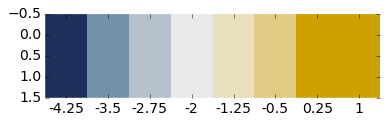

In [111]:
# recapitulate heat map colors from PLOS paper 

levels = [ -4.25, -3.50, -2.75, -2, -1.25, -.50, .25, 1]

colors = [

( 0.11, .19, .36 ), # deep blue
( .46, .57, .66 ), # medium blue
( .71, .76, .80 ), # light blue 

( .92, .92, .92 ), # grey 

( .92, .88, .74 ), # light yellow
( .88, .80, .51 ), # medium yellow 
( .81, .63, 0. ), # if above 1, use this same color 

]



cmap, _ = mcolors.from_levels_and_colors( levels, colors )
cmap.set_bad( 'red', alpha=1 ) # color for missing values 

import numpy as np 

my_array = np.array( [
        levels,
        levels
    ] )

plt.imshow( my_array, interpolation='none', cmap=cmap )
plt.xticks( range( len( levels ) ), levels )

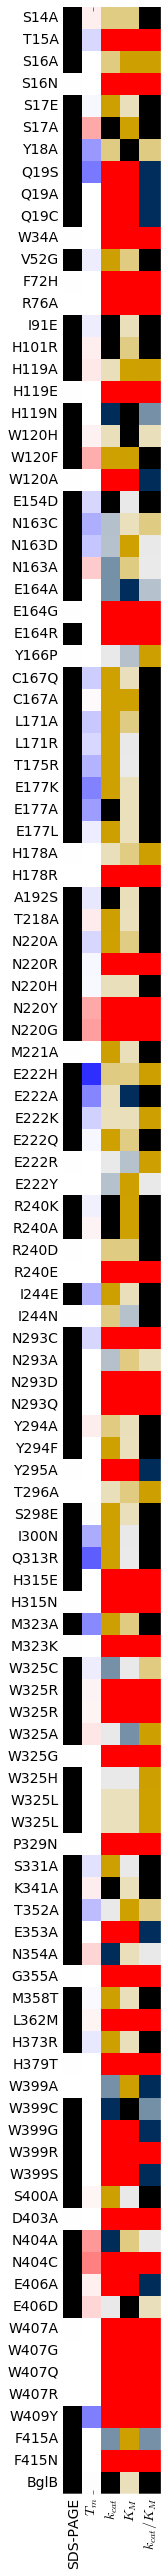

In [71]:
# heat map columns 

plt.figure( figsize=(18,36) ) 
plt.subplots_adjust(left=-11.8)
#plt.subplots_adjust(left=-11.46)
rc('axes', edgecolor='none')

font = { 'size': 14 }
rc('font', **font)

plt.subplot( 1, 6, 1 )
plt.imshow( heatmap[ ['n_expr'] ], interpolation='none', cmap='Greys' ) 
plt.tick_params( length=0 ) 
plt.xticks( [ 0 ], [ 'SDS-PAGE' ], rotation='vertical' ); plt.yticks( [] ) 
plt.yticks( range( len( heatmap.index ) ), heatmap.index )
plt.tick_params( length=0 ) 
#plt.colorbar()

plt.subplot( 1, 6, 2 )
plt.imshow( heatmap[ ['n_tm'] ], interpolation='none', cmap='bwr', vmin=-6, vmax=6 ) 
plt.xticks( [ 0 ], [ '$T_m$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.colorbar()

plt.subplot( 1, 6, 3 )
plt.imshow( heatmap[ ['n_kcat'] ], interpolation='none', cmap=cmap  ) 
plt.xticks( [ 0 ], [ '$k_{cat}$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 4 )
plt.imshow( heatmap[ ['n_km'] ], interpolation='none', cmap=cmap ) 
plt.xticks( [ 0 ], [ '$K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

plt.subplot( 1, 6, 5 )
plt.imshow( heatmap[ ['n_kcatkm'] ], interpolation='none', cmap=cmap ) 
plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
plt.tick_params( length=0 ) 

#plt.subplot( 1, 6, 6 )
#plt.scatter( 0, 0 ) 
#plt.xticks( [ 0 ], [ '$k_{cat}/K_M$' ], rotation='vertical' ); plt.yticks( [] ) 
#plt.tick_params( length=0 ) 

plt.tight_layout()
#plt.savefig( 'fig2/plt_out.png', dpi=300 ) 
plt.show() 

In [72]:
import numpy as np 

my_array = np.array( [
        levels,
        levels
    ] )

plt.imshow( my_array, interpolation='none', cmap=cmap )
plt.xticks( range( len( levels ) ), levels )

([<matplotlib.axis.XTick at 0x117d83690>,
 <a list of 11 Text xticklabel objects>)

## Figure 3: drawings of mutants 

## Figure 4: colored by Tm 

## Figure 5: machine learning 